In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_csv("pharmacy_with_pop.csv")
df.head(20)

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
0,2017-01-01,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,95,95-99,Antwerp,Unknown,Unknown,2017,5274.0,16548.0,21822.0
1,2017-01-01,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62,92,90-94,Antwerp,Nervous system,Analgesic drugs,2017,28060.0,66339.0,94399.0
2,2017-01-01,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98,85,85-89,Flemish Brabant,Cardiovascular system,Calcium channel blockers,2017,73868.0,134533.0,208401.0
3,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,84,80-84,Flemish Brabant,Unknown,Unknown,2017,130079.0,192247.0,322326.0
4,2017-01-01,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,86,85-89,Brussels,"Systemic hormonal preparations, excluding repr...",Corticosteroids systemic,2017,73868.0,134533.0,208401.0
5,2017-01-01,8272695,10,1933,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,84,80-84,Brussels,"Systemic hormonal preparations, excluding repr...",Corticosteroids systemic,2017,130079.0,192247.0,322326.0
6,2017-01-01,8272695,16,1935,2,1715127,AMOXICLAV SANDOZ 875 MG/125 MG COMP 20,J01CR02,20,15.18,3.58,82,80-84,Flemish Brabant,Antiinfectives for systemic use,Antibacterial drugs,2017,130079.0,192247.0,322326.0
7,2017-01-01,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00,84,80-84,Flemish Brabant,Unknown,Unknown,2017,130079.0,192247.0,322326.0
8,2017-01-01,8272695,21,1940,1,5520523,WACHTHONORARIUM,,0,4.90,0.00,77,75-79,Antwerp,Unknown,Unknown,2017,167098.0,212666.0,379764.0
9,2017-01-01,7939080,45,1949,2,1537380,AROMASIN 25MG COMP 100,L02BG06,100,152.84,0.00,68,65-69,Liege,Antineoplastic and immunomodulating agents,Endocrine therapy,2017,296720.0,321786.0,618506.0


In [3]:
df['Age Group'] = df['Age Group'].apply(lambda x: x.replace('100 or older', '100+'))

In [4]:
MedicationType = 'Psychoanaleptics'
Frequency= 'M'

In [5]:
is_Med = df['Medication_Type'] == MedicationType
df2 = df[is_Med]
df2.head()

,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
40,2017-01-01,7641438,40,1969,2,3183092,CYMBALTA 60 MG MAAGSAPRESIST. CAPS 98 X 60 MG,N06AX21,98,53.30,13.67,48,45-49,Liege,Nervous system,Psychoanaleptics,2017,400752.0,384630.0,785382.0
838,2017-01-01,7084071,86,1899,0,126987,REDOMEX DIFFUCAPS CAPS 40 X 25 MG,N06AA09,40,7.22,0.91,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
839,2017-01-01,7056201,89,1899,0,127019,REDOMEX DIFFUCAPS CAPS 40 X 50 MG,N06AA09,40,8.83,0.89,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
978,2017-01-01,7067208,20,1899,0,1390343,SERLAIN 50 MG COMP PELL 30 X 50 MG,N06AB06,30,14.96,2.14,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
1269,2017-01-01,7122399,30,1899,0,1625672,FLUOXETINE EG CAPS 56 X 20 MG,N06AB03,56,25.74,4.26,118,100+,Flemish Brabant,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN


In [6]:
##is_Age = df2['Age Group'] == AgeGroup
##df2 = df2[is_Age]
##df2.head()

In [7]:
df2['Delivery Date'] = df2['Delivery Date'].astype('datetime64[ns]')
df2.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Delivery Date,Pharmacy No,Pharmacy Post,YOB,Gender,CNK,Product Name,ATC,Units,Price,Contribution,Age,Age Group,Province,ATC_Classification,Medication_Type,year,M,F,Total Population
40,2017-01-01,7641438,40,1969,2,3183092,CYMBALTA 60 MG MAAGSAPRESIST. CAPS 98 X 60 MG,N06AX21,98,53.30,13.67,48,45-49,Liege,Nervous system,Psychoanaleptics,2017,400752.0,384630.0,785382.0
838,2017-01-01,7084071,86,1899,0,126987,REDOMEX DIFFUCAPS CAPS 40 X 25 MG,N06AA09,40,7.22,0.91,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
839,2017-01-01,7056201,89,1899,0,127019,REDOMEX DIFFUCAPS CAPS 40 X 50 MG,N06AA09,40,8.83,0.89,118,100+,West Flanders,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
978,2017-01-01,7067208,20,1899,0,1390343,SERLAIN 50 MG COMP PELL 30 X 50 MG,N06AB06,30,14.96,2.14,118,100+,Antwerp,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN
1269,2017-01-01,7122399,30,1899,0,1625672,FLUOXETINE EG CAPS 56 X 20 MG,N06AB03,56,25.74,4.26,118,100+,Flemish Brabant,Nervous system,Psychoanaleptics,2017,NaN,NaN,NaN


In [8]:
res = df2.set_index('Delivery Date').groupby([pd.Grouper(freq=Frequency), 'Total Population', 'Age Group'])['Units'].sum().reset_index()

print(res)

    Delivery Date  Total Population Age Group   Units
0      2017-01-31           21822.0     95-99    5188
1      2017-01-31           94399.0     90-94   31220
2      2017-01-31          208401.0     85-89   91037
3      2017-01-31          322326.0     80-84  139935
4      2017-01-31          379764.0     75-79  152454
..            ...               ...       ...     ...
701    2019-12-31          751517.0     40-44  131912
702    2019-12-31          754578.0     35-39  107362
703    2019-12-31          772635.0     45-49  178354
704    2019-12-31          799615.0     55-59  256272
705    2019-12-31          802276.0     50-54  237066

[706 rows x 4 columns]


In [9]:
res['Month'] = 0
res['Month'] = pd.DatetimeIndex(res['Delivery Date']).month
res.head()

,Delivery Date,Total Population,Age Group,Units,Month
0,2017-01-31,21822.0,95-99,5188,1
1,2017-01-31,94399.0,90-94,31220,1
2,2017-01-31,208401.0,85-89,91037,1
3,2017-01-31,322326.0,80-84,139935,1
4,2017-01-31,379764.0,75-79,152454,1


In [10]:
res['Age'] = 0
res['Age'] = res['Age Group'].map( {'0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4, '20-24': 5, '25-29': 6, '30-34': 7, '35-39': 8, '40-44': 9, '45-49': 10, '50-54': 11, '55-59': 12, '60-64': 13, '65-69': 14, '70-74': 15, '75-79': 16, '80-84': 17, '85-89': 18, '90-94': 19, '95-99': 20, '100+': 20, } ).astype(int)
res.head(3)

,Delivery Date,Total Population,Age Group,Units,Month,Age
0,2017-01-31,21822.0,95-99,5188,1,20
1,2017-01-31,94399.0,90-94,31220,1,19
2,2017-01-31,208401.0,85-89,91037,1,18


In [11]:
res['Total Population'] = res['Total Population'].astype(float)
res.dtypes
res = res.reset_index()
res.head()

,index,Delivery Date,Total Population,Age Group,Units,Month,Age
0,0,2017-01-31,21822.0,95-99,5188,1,20
1,1,2017-01-31,94399.0,90-94,31220,1,19
2,2,2017-01-31,208401.0,85-89,91037,1,18
3,3,2017-01-31,322326.0,80-84,139935,1,17
4,4,2017-01-31,379764.0,75-79,152454,1,16


In [12]:
res.dtypes

index                        int64
Delivery Date       datetime64[ns]
Total Population           float64
Age Group                   object
Units                        int64
Month                        int64
Age                          int32
dtype: object

In [13]:
cols = list(res.columns)
a, b = cols.index('Age Group'), cols.index('Age')
cols[b], cols[a] = cols[a], cols[b]
res = res[cols]

In [14]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
res[[i for i in list(res.columns)[2:5]]] = minmax.fit_transform(res[[i for i in list(res.columns)[2:5]]])
print(res)

     index Delivery Date  Total Population       Age     Units  Month  \
0        0    2017-01-31          0.000000  1.000000  0.018426      1   
1        1    2017-01-31          0.091636  0.947368  0.111238      1   
2        2    2017-01-31          0.235574  0.894737  0.324504      1   
3        3    2017-01-31          0.379416  0.842105  0.498841      1   
4        4    2017-01-31          0.451937  0.789474  0.543475      1   
..     ...           ...               ...       ...       ...    ...   
701    701    2019-12-31          0.921312  0.421053  0.470237     12   
702    702    2019-12-31          0.925177  0.368421  0.382708     12   
703    703    2019-12-31          0.947976  0.473684  0.635817     12   
704    704    2019-12-31          0.982041  0.578947  0.913620     12   
705    705    2019-12-31          0.985401  0.526316  0.845144     12   

    Age Group  
0       95-99  
1       90-94  
2       85-89  
3       80-84  
4       75-79  
..        ...  
701     40-

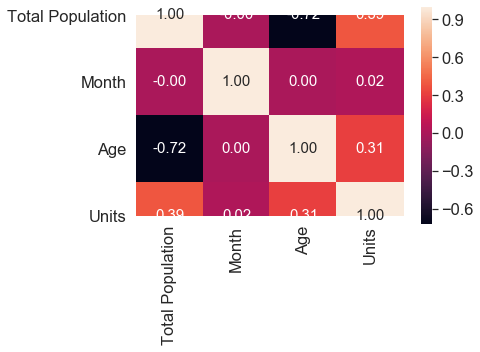

In [15]:
cols = ['Total Population','Month', 'Age', 'Units']
cm = np.corrcoef(res[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = res[['Total Population','Age']].values
y = res['Units'].values
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 1.193
Intercept: -1.058


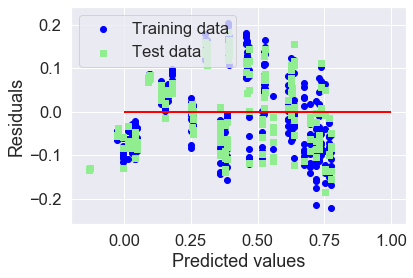

In [17]:
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data'
)
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data'
)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-0, xmax=1, lw=2, color='red')
plt.show()

In [18]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Squared Error: ",mean_squared_error(y_test, y_test_pred))
errors = abs(y_test_pred-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score: ',r2_score(y_test, y_test_pred))
print('Median Absolute Error: ',median_absolute_error(y_test, y_test_pred))
print('Accuracy: ', slr.score(X_test,y_test)*100)

Mean Squared Error:  0.007453403110110695
Mean Absolute Error: 0.07
R2 score:  0.8953789950699395
Median Absolute Error:  0.07063054115529932
Accuracy:  89.53789950699395


In [19]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

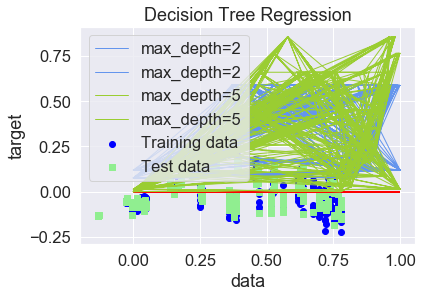

In [21]:
plt.figure()
plt.scatter(y_train_pred, y_train_pred - y_train,
    c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
    c='lightgreen', marker='s', label='Test data')
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=1)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.hlines(y=0, xmin=-0, xmax=1, lw=2, color='red')
plt.show()

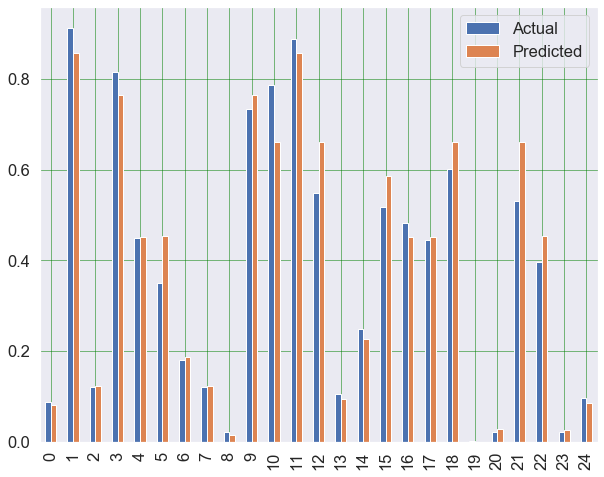

In [37]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_2})
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Squared Error: ",mean_squared_error(y_test, y_1))
errors = abs(y_1-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('R2 score Model 1: ',r2_score(y_test, y_1))
print('R2 score Model 2: ',r2_score(y_test, y_2))
print('Median Absolute Error: ',median_absolute_error(y_test, y_1))
print('Accuracy Model 1: ', regr_1.score(X_test,y_test)*100)
print('Accuracy Model 2: ', regr_2.score(X_test,y_test)*100)

Mean Squared Error:  0.016193578479481607
Mean Absolute Error: 0.1
R2 score Model 1:  0.772695984785934
R2 score Model 2:  0.9668504699790277
Median Absolute Error:  0.0758911358497309
Accuracy Model 1:  77.26959847859341
Accuracy Model 2:  96.68504699790277


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


ValueError: x and y must be the same size

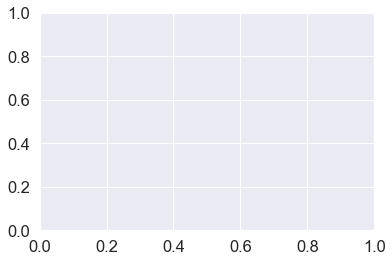

In [41]:
#Linear SVR

#Fit The plot
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()